In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [34]:
df

,Unnamed: 0,Incident,Location,Reported,Occurred,Comments / Nature of Fire,Disposition,UCPDI#,Reported_datetime,Reported_year,Reported_month,Reported_hour,Occurred_range_or_exact,Occurred_lower_range,Occurred_upper_range,Months_since,Reported_day,Day_of_year
0,0,lost property,5810 s. university (quad),7/1/10 12:42 pm,6/28/10 2:45 pm,Woman reports losing a Canon Power Shot digita...,closed,W0731,2010-07-01 12:42:00,2010,7,12,exact,2010-06-28 14:45:00,2010-06-28 14:45:00,0,1,183
1,1,criminal damage to vehicle,61st & drexel,7/1/10 2:01 pm,6/29/10 to 7/1/10 3:00 pm to 1:50 pm,Unknown person smashed windshield of a rental ...,open,W0732,2010-07-01 14:01:00,2010,7,14,range,2010-06-29 15:00:00,2010-07-01 13:50:00,0,1,183
2,2,theft from motor vehicle,60th between ingleside & ellis,7/1/10 2:48 pm,6/29/10 to 7/1/10 5:30 pm to 12:30 pm,Unknown person smashed rear passenger's side w...,open,W0733,2010-07-01 14:48:00,2010,7,14,range,2010-06-29 17:30:00,2010-07-01 12:30:00,0,1,183
3,3,theft,60th and ellis,7/1/10 3:13 pm,6/23/10 to 6/29/10 9:00 am to 5:00 pm,Bicycle taken from bike rack,open,W0734,2010-07-01 15:13:00,2010,7,15,range,2010-06-23 09:00:00,2010-06-29 17:00:00,0,1,183
4,4,chemical spill,924 e. 57th st. (bslc),7/1/10 6:15 pm,7/1/10 6:15 pm,"Bottle slipped from man's hands, broke causing...",closed,W0735,2010-07-01 18:15:00,2010,7,18,exact,2010-07-01 18:15:00,2010-07-01 18:15:00,0,1,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14201,15456,criminal trespass to residence,ingleside between 52nd & 53rd,12/30/21 9:57 am,12/30/21 9:57 am,Ex-boyfriend broke door of off-campus apartmen...,arrest,21-00920,2021-12-30 09:57:00,2021,12,9,exact,2021-12-30 09:57:00,2021-12-30 09:57:00,137,30,365
14202,15457,information / traffic crash / damage to uc pro...,821 e. 55th st. (stagg field),12/30/21 12:26 pm,12/30/21 12:26 pm,Motorist lost control of vehicle and crashed i...,cpd,21-00921,2021-12-30 12:26:00,2021,12,12,exact,2021-12-30 12:26:00,2021-12-30 12:26:00,137,30,365
14203,15458,criminal damage to property,6050 s. ingleside (uc neighborhood apartments),12/30/21 4:31 pm,12/13/21 to 12/30/21 3:00 am to 4:00 am,Unknown person(s) broke and removed lock from ...,open,21-00922,2021-12-30 16:31:00,2021,12,16,range,2021-12-13 03:00:00,2021-12-30 04:00:00,137,30,365
14204,15459,information,5721 s. maryland (comer hospital),12/30/21 7:38 pm,12/30/21 7:35 pm,UCPD was informed that a person in a small fam...,closed,21-00923,2021-12-30 19:38:00,2021,12,19,exact,2021-12-30 19:35:00,2021-12-30 19:35:00,137,30,365


In [41]:
def day_of_year(month, day):
    cal = {1:0, 2:31, 3:60, 4:91, 5:121, 6:152, 7:182, 8:213, 9:244, 10:274, 11:305, 12:335}
    return(cal[month] + day)

def num_to_hour(num):
    if num == 0: return ("12 am")
    elif num < 12: return(str(num) + " am")
    elif num == 12: return("12 pm")
    else: return(str(num - 12) + " pm")

137


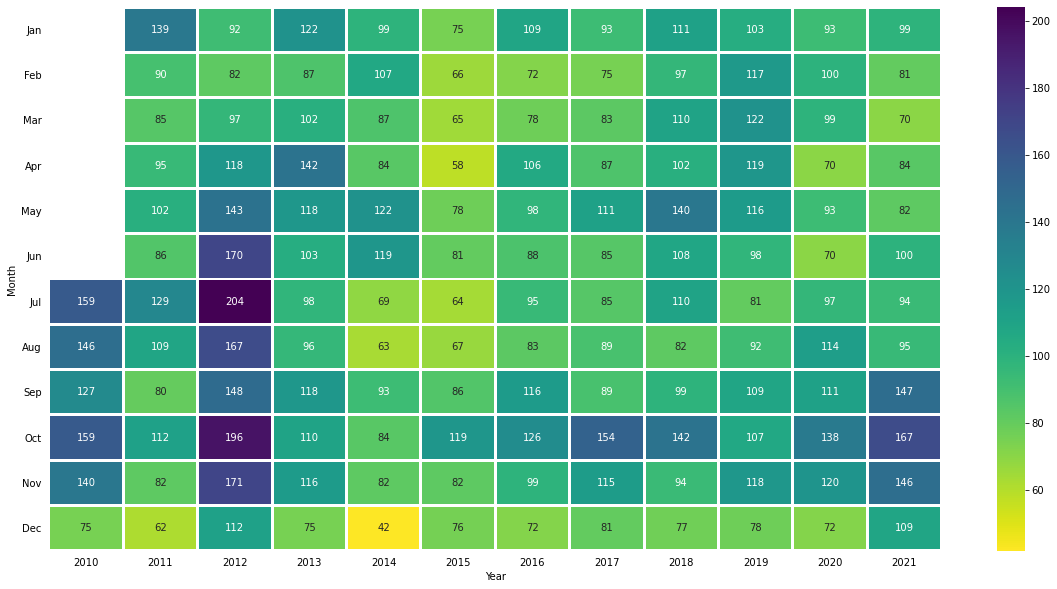

In [91]:
header = ["month"]
for year in range(2010, 2022):
    header.append(year)
total_count = [header]


for month in range(1,13):
    month_count = [calendar.month_name[month][0:3]]
    df_month = df[df["Reported_month"] == month]
    for year in range(2010, 2022):
        if year == 2010 and month < 7: 
            month_count.append(np.NaN)
            continue
        df_year = df_month[df_month["Reported_year"] == year]
        month_count.append(len(df_year))
    total_count.append(month_count)

df_count = pd.DataFrame(total_count[1:], columns=total_count[0]).set_index("month")

sns.heatmap(df_count, annot=True, fmt = ".0f", linewidths=2, cmap = "viridis_r")
plt.xticks(rotation = 0)
plt.xlabel("Year")
plt.ylabel("Month")
plt.tick_params(top= False, bottom=False, left=False, right=False, labelbottom='on')
plt.gcf().set_size_inches(20, 10)
plt.show()

In [2]:
header = ["hour"]
for month in range(0, 138):
    header.append(month)
total_count = [header]

for hour in range(0,24):
    hour_count = [hour]
    df_hour = df[df["Reported_hour"] == hour]
    for month in range(0, 138):
        df_month = df_hour[df_hour["Months_since"] == month]
        hour_count.append(len(df_month))
    total_count.append(hour_count)


df_count = pd.DataFrame(total_count[1:], columns=total_count[0])
df_count["hour"] = df_count["hour"].apply(num_to_hour)
df_count["empty"] = np.NaN
df_count["Average"] = df_count.mean(axis=1)
df_count = df_count.set_index("hour")

# fig, axes = plt.subplots(1, 2, sharey=True)
# main = sns.heatmap(df_count.drop("Average", axis=1), ax = axes[0], cmap = "viridis_r", linewidth=1, robust=True, cbar = False)
# avg = sns.heatmap(df_count["Average"].to_frame(), ax = axes[1], cmap = "viridis_r", linewidth=1, robust=True, vmin = 0, vmax = 12)
# plt.sca(axes[0])

main = sns.heatmap(df_count, cmap = "viridis_r", linewidth=1, robust=True)

plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel("Months since Start")
plt.ylabel("Hour")
plt.tick_params(top= False, bottom=False, left=False, right=False, labelbottom='on')
plt.gcf().set_size_inches(25, 15)
plt.show()

NameError: name 'df' is not defined

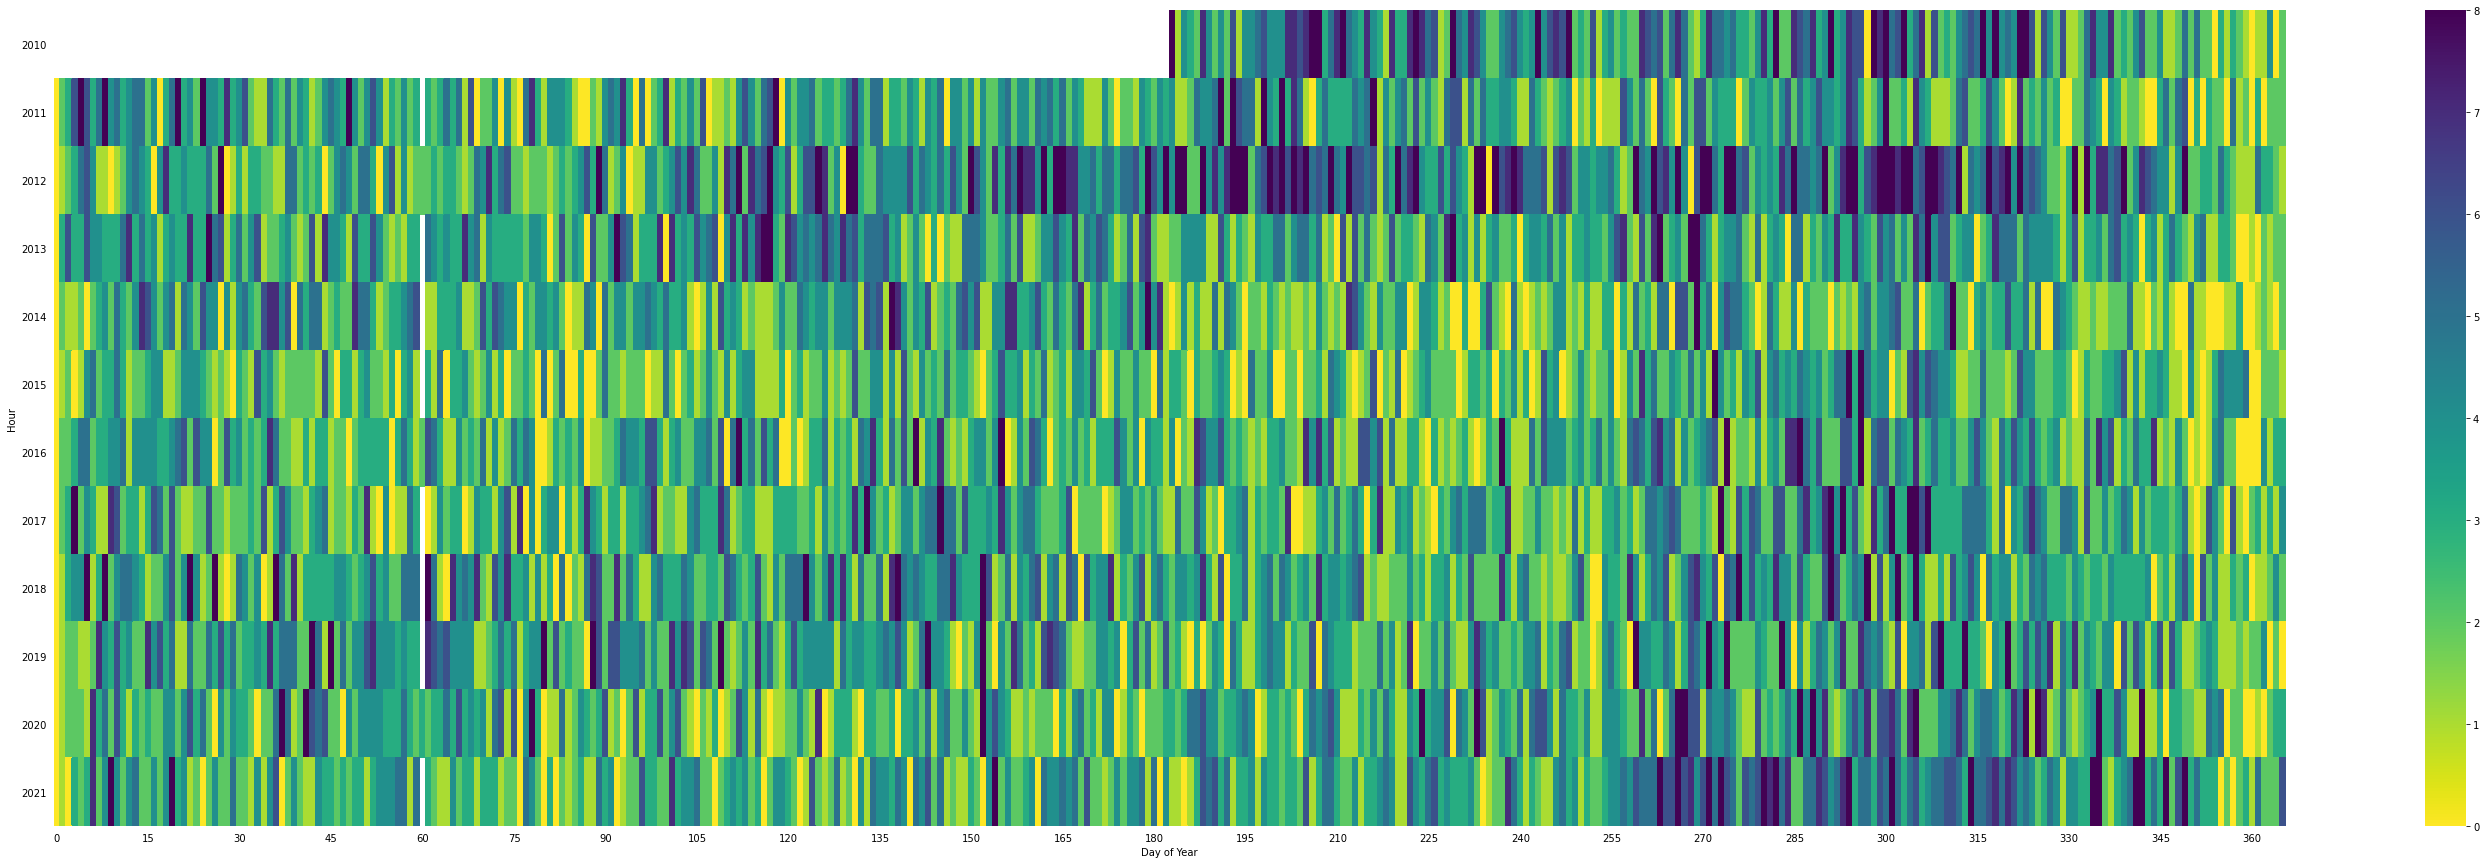

In [109]:
header = ["day"]
for day in range(0, 366):
    header.append(day)
total_count = [header]

for year in range(2010, 2022):
    year_count = [year]
    df_year = df[df["Reported_year"] == year]
    for day in range(0, 366):
        if year == 2010 and day < 183: 
            year_count.append(np.NaN)
            continue
        elif (year % 4 != 0) and day == 60:
            year_count.append(np.NaN)
            continue
        df_day = df_year[df_year["Day_of_year"] == day]
        year_count.append(len(df_day))
    total_count.append(year_count)


df_count = pd.DataFrame(total_count[1:], columns=total_count[0]).set_index("day")

sns.heatmap(df_count, cmap = "viridis_r", robust=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel("Day of Year")
plt.ylabel("Hour")
plt.tick_params(top= False, bottom=False, left=False, right=False, labelbottom='on')
plt.gcf().set_size_inches(50, 15)
plt.show()